In [1]:
import sys
import pickle
import bz2
from matplotlib import pyplot as plt

sys.path.append('..')

from ruv.relative_utility_value import *
from ruv.damage_functions import *
from ruv.economic_models import *
from ruv.utility_functions import *
from ruv.helpers import *

awrc = '401012'
dataset_filepath = '%s_data.pickle.bz2' % awrc
parallel_nodes = 8
alpha_step = 0.5

with bz2.BZ2File(dataset_filepath, 'r') as f:
    data = pickle.load(f)
obs, clim_ens, fcst_ens = data['obs'], data['clim'], data['fcst']

obs = np.concatenate([obs, obs, obs])
clim_ens = np.concatenate([clim_ens, clim_ens, clim_ens])
fcst_ens = np.concatenate([fcst_ens, fcst_ens, fcst_ens])

print(obs.shape, fcst_ens.shape, clim_ens.shape)

decision_threshold = np.nanquantile(obs, 0.75)

decision_definition = {
    'alphas': np.arange(alpha_step, 1, alpha_step),
    'damage_function': [binary, {'max_loss': 1, 'min_loss': 0, 'threshold': decision_threshold}],        
    'utility_function': [cara, {'A': 0}],
    'economic_model': [cost_loss, cost_loss_analytical_spend],
    'decision_thresholds': np.insert([decision_threshold], 0, 0),
    'event_freq_ref': True
}

ref = clim_ens

decision_definition['decision_method'] = 'optimise_over_forecast_distribution'

(5796,) (5796, 100) (5796, 484)


In [2]:
results_optim = relative_utility_value(obs, fcst_ens, ref, decision_definition, parallel_nodes, verbose=True)

2023-11-15 00:22:35,082 - tornado.application - ERROR - Exception in callback <bound method BokehTornado._keep_alive of <bokeh.server.tornado.BokehTornado object at 0x000002384AD88BB0>>
Traceback (most recent call last):
  File "c:\Users\me\anaconda3\lib\site-packages\tornado\ioloop.py", line 919, in _run
    val = self.callback()
  File "c:\Users\me\anaconda3\lib\site-packages\bokeh\server\tornado.py", line 779, in _keep_alive
    c.send_ping()
  File "c:\Users\me\anaconda3\lib\site-packages\bokeh\server\connection.py", line 91, in send_ping
    self._socket.ping(str(self._ping_count).encode("utf-8"))
  File "c:\Users\me\anaconda3\lib\site-packages\tornado\websocket.py", line 439, in ping
    raise WebSocketClosedError()
tornado.websocket.WebSocketClosedError
2023-11-15 00:22:36,086 - tornado.application - ERROR - Exception in callback <bound method BokehTornado._keep_alive of <bokeh.server.tornado.BokehTornado object at 0x000002384AD88BB0>>
Traceback (most recent call last):
  File "

Alpha: 0.500   RUV: 0.76


In [3]:
# 3 times as long, but only 1 alpha value
pathos = 18.6
dask_lowlevel_client = 20.3
dask_highlevel_client = 19.0

In [4]:
# 3 times as long, but only 3 alpha value
pathos = 1
dask_lowlevel_client = 82
dask_highlevel_client = 84

In [5]:
# 8 core - normal length
pathos = 21
dask_threads_1 = 43
dask_threads_4 = 41
dask_threads_sqrt = 34
dask_threads_sqrt_time_2 = 38
dask_threads_sqrt_div_2 = 59
dask_processes_1 = 54
dask_processes_sqrt = 198
dask_single_threaded = 42

In [6]:
# 8 core - 5 times length
pathos = '7m 16s'
dask_threads_sqrt = '3m 29s'
dask_client = '3m 29s'

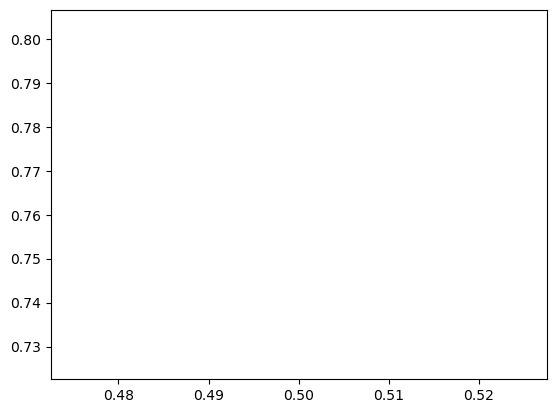

In [7]:
plt.plot(decision_definition['alphas'], results_optim['ruv'])